In [5]:
import pandas as pd


df = pd.read_csv(r'C:\Users\mehta\Downloads\qthon\New folder\bftusd.csv')



df.head()


,time,open,close,high,low,volume
0,1523116860000,0.13,0.1300,0.13,0.1300,977.000000
1,1523116920000,0.13,0.1290,0.13,0.1290,5887.941213
2,1523116980000,0.12,0.1200,0.12,0.1200,604.440930
3,1523117040000,0.12,0.1180,0.12,0.1180,1000.011200
4,1523117100000,0.11,0.0883,0.14,0.0883,99762.362670


In [6]:
df.tail()

,time,open,close,high,low,volume
328598,1672308780000,0.004394,0.004394,0.004394,0.004394,481.610406
328599,1672309140000,0.004391,0.004391,0.004391,0.004391,351.074231
328600,1672309500000,0.004389,0.004389,0.004389,0.004389,548.748741
328601,1672309560000,0.003989,0.003989,0.003989,0.003989,596.452584
328602,1672309860000,0.004379,0.004031,0.004379,0.004031,905.123917


LONG SHORT TERM MEMORY:

Epoch 1/10
12684/12684 [==============================] - 148s 11ms/step - loss: 4.0602e-05
Epoch 2/10
12684/12684 [==============================] - 153s 12ms/step - loss: 4.9644e-06
Epoch 3/10
12684/12684 [==============================] - 151s 12ms/step - loss: 3.1334e-06
Epoch 4/10
12684/12684 [==============================] - 169s 13ms/step - loss: 2.6429e-06
Epoch 5/10
12684/12684 [==============================] - 149s 12ms/step - loss: 2.4843e-06
Epoch 6/10
12684/12684 [==============================] - 148s 12ms/step - loss: 2.3067e-06
Epoch 7/10
12684/12684 [==============================] - 156s 12ms/step - loss: 2.2095e-06
Epoch 8/10
12684/12684 [==============================] - 147s 12ms/step - loss: 2.1400e-06
Epoch 9/10
12684/12684 [==============================] - 143s 11ms/step - loss: 2.0899e-06
Epoch 10/10
3171/3171 [==============================] - 16s 5ms/step
Mean Squared Error: 3.818070336817055e-15


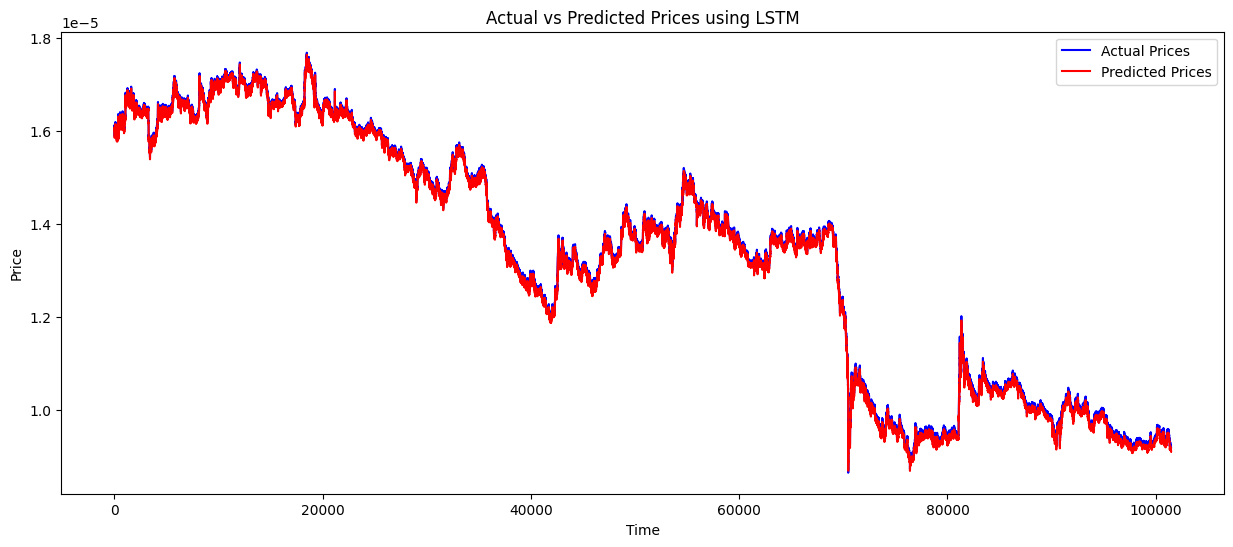

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


df = pd.read_csv('C:\\Users\\mehta\\Downloads\\qthon\\New folder\\adabtc.csv')


data = df['close'].values.reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq_in = data[i:i + seq_length]
        seq_out = data[i + seq_length]
        X.append(seq_in)
        y.append(seq_out)
    return np.array(X), np.array(y)

seq_length = 10  
X, y = create_sequences(scaled_data, seq_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))


mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print("Mean Squared Error:", mse)


plt.figure(figsize=(15, 6))
plt.plot(y_test_inverse, label='Actual Prices', color='blue')
plt.plot(y_pred_inverse, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Random forest

Accuracy: 0.5867941263427614
Precision: 0.4561717352415027
Confusion Matrix:
 [[59032   608]
 [41320   510]]


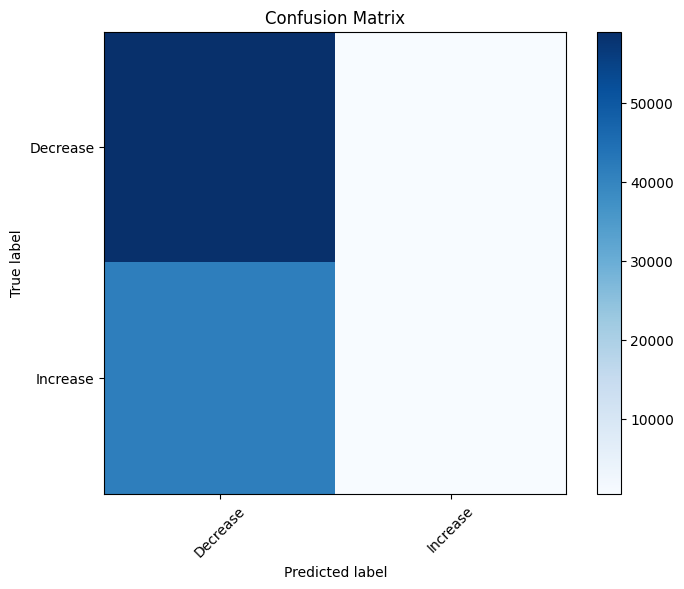

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix


df = pd.read_csv('C:\\Users\\mehta\\Downloads\\qthon\\New folder\\adabtc.csv')


df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)


features = ['open', 'high', 'low', 'volume']


X = df[features]
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Decrease', 'Increase']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


principal component analysis

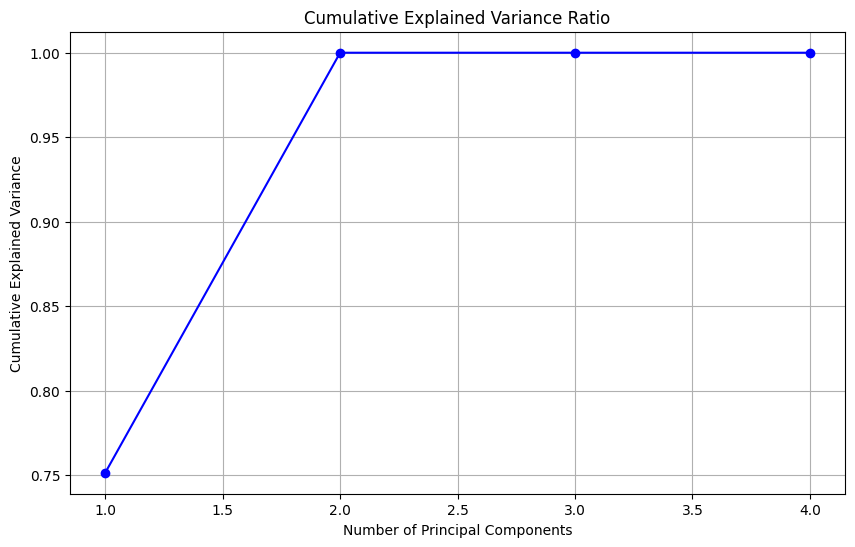

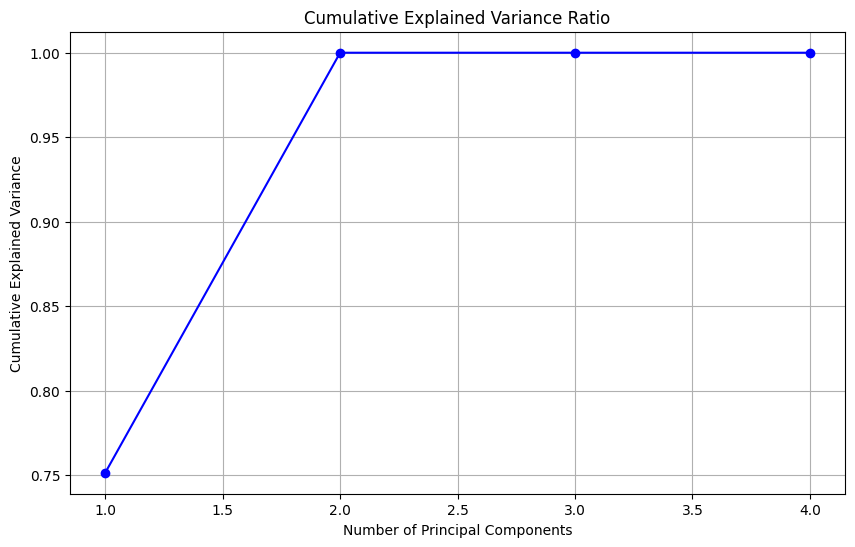

Accuracy: 0.54300778555238
Precision: 0.43631314689630024
Recall: 0.3718622997848434
F1 Score: 0.4015177914585511
Confusion Matrix:
 [[39544 20096]
 [26275 15555]]


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


df = pd.read_csv('C:\\Users\\mehta\\Downloads\\qthon\\New folder\\adabtc.csv')


features = ['open', 'high', 'low', 'volume']


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])


pca = PCA()
pca_result = pca.fit_transform(scaled_data)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


num_components = 3  


pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(scaled_data)


y = np.where(df['close'].shift(-1) > df['close'], 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)